# <center> Prediction of life time value of customer </center>

The datasets has been provided to us via INSOFE's SCT portal.

Forecasting is an important approach to take an optimal decision and implement appropriate action plans. A major non-life insurance company wants to evaluate customer life time value based on each customer’s demographics and policy information including claim details. The CLV is a profitability metric in terms of a value placed by the company on each customer and can be conceived in two dimensions: the customer's present Value and potential future Value.

**Customer lifetime value (CLV)** is one of the key stats likely to be tracked as part of a customer experience program. CLV is a measurement of *how valuable a customer is to your company* with an unlimited time span as opposed to just the first purchase. 

Ref : https://www.qualtrics.com/experience-management/customer/customer-lifetime-value/

This metric helps you understand a reasonable cost per acquisition.

Our target is to predict the **life time value of customer.**

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os

# Visualization
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Skipping Warnings
import warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
os.getcwd()

'C:\\Neeraj\\acads\\INSOFE\\STUDY MATERIAL\\MiTH'

In [2]:
train = pd.read_csv('C:\\Neeraj\\acads\\INSOFE\\STUDY MATERIAL\\MiTH\\train-1574429526318.csv', 
                    index_col = 0, na_values = '?')

main_test =pd.read_csv('C:\\Neeraj\\acads\\INSOFE\\STUDY MATERIAL\\MiTH\\test-1574429501088.csv', 
                    index_col = 0, na_values = '?')

The `train` dataset set will help us train and validate our models.

The `main_test` dataset is where we will actually make our predictions.

In [5]:
train.shape

(9806, 21)

## Exploratory Data Analysis

An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.

Ref: https://www.datadecisionsgroup.com/blog/bid/176827/a-closer-look-at-exploratory-data-analysis-what-and-why

EDA unvolves four main steps:
- Data Collection
- Data Cleaning
- Data Preprocessing
- Visualization

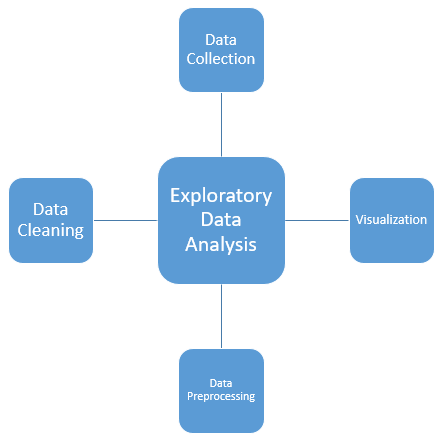



We will be going through all the steps as we progress.

In [6]:
train.describe(include='all')

,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
count,9806.000000,8881,9677,9688,9677,9688.000000,9806,9687,9677,9012.000000,9806.000000,9806.000000,8988.000000,9685.000000,8915,9685,9678,9678,9806.000000,9680,9680.000000
unique,NaN,3,5,5,2,NaN,2840,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,NaN
top,NaN,Basic,Bachelor,Employed,F,NaN,"NA,NA",Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,NaN
freq,NaN,5361,2934,6020,4985,NaN,119,6204,5643,NaN,NaN,NaN,NaN,NaN,6620,3637,3975,3670,NaN,4869,NaN
mean,7998.047015,NaN,NaN,NaN,NaN,37511.054604,NaN,NaN,NaN,93.340657,15.143993,48.165001,0.379172,2.960351,NaN,NaN,NaN,NaN,438.266734,NaN,2.089773
std,6848.055899,NaN,NaN,NaN,NaN,30292.974468,NaN,NaN,NaN,34.417763,10.004327,27.963630,0.896427,2.389801,NaN,NaN,NaN,NaN,293.502301,NaN,0.538524
min,1898.007675,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,1.000000
25%,4013.949039,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,68.750000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,280.352767,NaN,2.000000
50%,5780.182197,NaN,NaN,NaN,NaN,33767.500000,NaN,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,384.007015,NaN,2.000000
75%,8960.280213,NaN,NaN,NaN,NaN,62018.000000,NaN,NaN,NaN,109.000000,23.000000,71.750000,0.000000,4.000000,NaN,NaN,NaN,NaN,553.540973,NaN,2.000000


We can see that `Location.Geo` are cardinal values and has unique values. Hence, we can drop this feature.

In [3]:
train = train.drop('Location.Geo', axis = 1)
main_test = main_test.drop('Location.Geo', axis = 1)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 5917 to 11323
Data columns (total 20 columns):
Customer.Lifetime.Value          9806 non-null float64
Coverage                         8881 non-null object
Education                        9677 non-null object
EmploymentStatus                 9688 non-null object
Gender                           9677 non-null object
Income                           9688 non-null float64
Location.Code                    9687 non-null object
Marital.Status                   9677 non-null object
Monthly.Premium.Auto             9012 non-null float64
Months.Since.Last.Claim          9806 non-null int64
Months.Since.Policy.Inception    9806 non-null int64
Number.of.Open.Complaints        8988 non-null float64
Number.of.Policies               9685 non-null float64
Policy.Type                      8915 non-null object
Policy                           9685 non-null object
Renew.Offer.Type                 9678 non-null object
Sales.Channel         

In [9]:
train.isna().sum()

Customer.Lifetime.Value            0
Coverage                         925
Education                        129
EmploymentStatus                 118
Gender                           129
Income                           118
Location.Code                    119
Marital.Status                   129
Monthly.Premium.Auto             794
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints        818
Number.of.Policies               121
Policy.Type                      891
Policy                           121
Renew.Offer.Type                 128
Sales.Channel                    128
Total.Claim.Amount                 0
Vehicle.Class                    126
Vehicle.Size                     126
dtype: int64

We can see a lot of missing values. Let us verify this in the further steps and take necessary actions, if needed.

### Separating the `categorical features` and `numerical features`

In [4]:
# Categorical features
cat_cols = ['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status',
            'Number.of.Open.Complaints','Number.of.Policies','Policy.Type','Policy',
            'Renew.Offer.Type','Sales.Channel','Vehicle.Class','Vehicle.Size','Months.Since.Last.Claim',
           'Months.Since.Policy.Inception']

# Categorical features
num_cols = ['Customer.Lifetime.Value','Monthly.Premium.Auto','Income','Total.Claim.Amount']

# Removing the target variable from the 'num_cols' list
del num_cols[0]


### Let us check the unique values present in the `categorical features`

This step displays the unique values present in the dataset.

In [11]:
for i in cat_cols:
    print(i,'-->', train[i].unique(),'\n')

Coverage --> ['Basic' 'Extended' nan 'Premium'] 

Education --> ['Bachelor' 'College' 'High School or Below' 'Doctor' nan 'Master'] 

EmploymentStatus --> ['Unemployed' 'Employed' 'Retired' 'Medical Leave' 'Disabled' nan] 

Gender --> ['F' 'M' nan] 

Location.Code --> ['Urban' 'Suburban' 'Rural' nan] 

Marital.Status --> ['Married' 'Divorced' 'Single' nan] 

Number.of.Open.Complaints --> [nan  0.  1.  2.  3.  5.  4.] 

Number.of.Policies --> [ 2.  5.  3.  6.  1.  9.  8. nan  7.  4.] 

Policy.Type --> ['Personal Auto' 'Corporate Auto' 'Special Auto' nan] 

Policy --> ['Personal L2' 'Personal L1' 'Corporate L3' 'Special L2' 'Personal L3'
 'Corporate L1' 'Corporate L2' nan 'Special L3' 'Special L1'] 

Renew.Offer.Type --> ['Offer2' 'Offer1' 'Offer3' nan 'Offer4'] 

Sales.Channel --> ['Branch' 'Agent' 'Web' 'Call Center' nan] 

Vehicle.Class --> ['Four-Door Car' 'SUV' 'Two-Door Car' 'Luxury SUV' 'Sports Car'
 'Luxury Car' nan] 

Vehicle.Size --> [ 2.  1.  3. nan] 

Months.Since.Last.Claim 

We can see there are `NaN` values in the few categorical features. However, by seeing the unique values in each feature, the `NaN` values are not null values, but signifies that the particular field in **NOT APPLICABLE** for that customer.

Hence, we will modify these values to `None`.

In [5]:
cat_none_cols = ['Coverage','Education','EmploymentStatus', 'Number.of.Open.Complaints',
                 'Number.of.Policies','Policy.Type','Policy','Renew.Offer.Type',
                 'Sales.Channel','Vehicle.Class','Vehicle.Size']

for col in cat_none_cols:
    train[col] = train[col].fillna('None')
    main_test[col] = main_test[col].fillna('None')

<div class="alert alert-block alert-info"><b> 

 - We will make sure that the pre-processing steps are applied to the training-validation dataset should also be applied on the testing set

</b></div>

In [13]:
train[cat_cols].astype('category').describe()

,Coverage,Education,EmploymentStatus,Gender,Location.Code,Marital.Status,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class,Vehicle.Size,Months.Since.Last.Claim,Months.Since.Policy.Inception
count,9806,9806,9806,9677,9687,9677,9806.0,9806.0,9806,9806,9806,9806,9806,9806.0,9806,9806
unique,4,6,6,2,3,3,7.0,10.0,4,10,5,5,7,4.0,36,100
top,Basic,Bachelor,Employed,F,Suburban,Married,0.0,1.0,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,2.0,3,59
freq,5361,2934,6020,4985,6204,5643,7130.0,3459.0,6620,3637,3975,3670,4869,6795.0,405,156


In the previous steps, `EmploymentStatus` had 5 levels. After the `.fillna()` operation, the levels has increased to 6.

Hence, we have successfully converted the `NaN` to `None`

In [14]:
train[cat_cols].isna().sum()

Coverage                           0
Education                          0
EmploymentStatus                   0
Gender                           129
Location.Code                    119
Marital.Status                   129
Number.of.Open.Complaints          0
Number.of.Policies                 0
Policy.Type                        0
Policy                             0
Renew.Offer.Type                   0
Sales.Channel                      0
Vehicle.Class                      0
Vehicle.Size                       0
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
dtype: int64

<div class="alert alert-block alert-info"><b> 

 - For this problem statement, we will consider that:
  - There are only two categories for `Gender` ['Male, 'Female']
  - There are only three categories for `Location.Code` ['Rural', 'Suburban', 'Urban']
  - There are only three categories for `Maritial.Status` ['Married', 'Divorced', 'Single'] 
  
   We will impute them in the futher steps.

</b></div>

### Let us check the unique values present in the `numerical features`

In [15]:
for i in num_cols :
    print(i, '----->>', train[i].nunique(), ' :- ', train[i].unique()[:10], '\n')

Monthly.Premium.Auto ----->> 191  :-  [ 67. 101. 108. 116.  72. 211.  90.  93. 110. 117.] 

Income ----->> 4621  :-  [    0. 63357. 64125. 67544. 19651. 23589. 74126. 31409. 58577. 19683.] 

Total.Claim.Amount ----->> 4125  :-  [ 267.214383  565.508572  369.818708  556.8       345.6      1012.8
  478.751065  381.960657  303.872752  561.6     ] 



In [16]:
train[num_cols].isna().sum()

Monthly.Premium.Auto    794
Income                  118
Total.Claim.Amount        0
dtype: int64

We can see some missing values in the numerical features. We will impute them in the further steps.


___

## Train-Validation Split

For training our model, we will be splitting our training dataset into _training_ and _validation_ dataset. 

Once we decide to build our model with the optimal performance metrics, will will use our testing dataset to get our predictions.

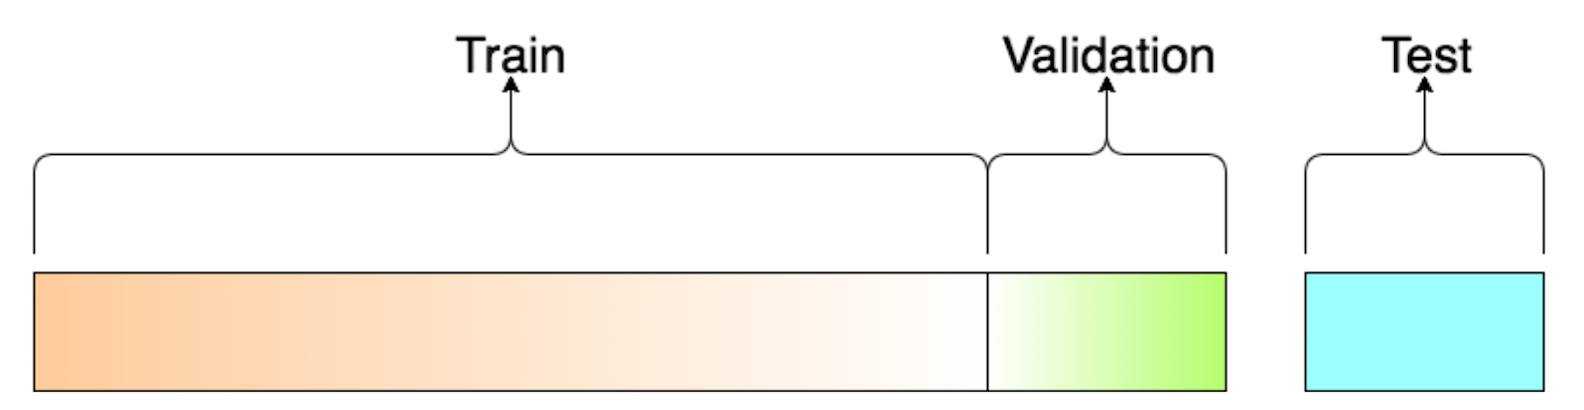
Ref : https://www.dailysmarty.com/posts/setting-up-test-validation-and-training-sets-of-data

In the further steps, we will split the data in train-validation sets to continue our further EDA.

In [6]:
from sklearn.model_selection import train_test_split

score_train, score_valid = train_test_split(train, test_size = 0.3, random_state = 1234)

In [7]:
print("Shape of training set:", score_train.shape)
print("Shape of validation set:", score_valid.shape)

Shape of training set: (6864, 20)
Shape of validation set: (2942, 20)


### Checking for NaN values in the training set

In [19]:
missing_values = score_train.isna().sum()

missing_values = missing_values[missing_values>0]
missing_values.sort_values(inplace=True)

In [20]:
miss_data = pd.DataFrame(missing_values, columns = ['Count of missing data'])
miss_data['Percentage of Null Values'] = pd.DataFrame(miss_data['Count of missing data']/len(score_train)*100)

miss_data

,Count of missing data,Percentage of Null Values
Income,86,1.252914
Location.Code,88,1.282051
Gender,92,1.340326
Marital.Status,92,1.340326
Monthly.Premium.Auto,574,8.362471


The percentage of missing values is just above 10%, which is very less.

Hence as discussed above, these values would be imputed.

### Imputation of the categorical data

In [8]:
from sklearn.impute import SimpleImputer

cat_imputer_1 = SimpleImputer(strategy = 'most_frequent',missing_values='nan')
score_train[cat_cols] = cat_imputer_1.fit_transform(score_train[cat_cols].astype(str))
score_valid[cat_cols] = cat_imputer_1.transform(score_valid[cat_cols].astype(str))
main_test[cat_cols] = cat_imputer_1.transform(main_test[cat_cols].astype(str))

cat_imputer_2 = SimpleImputer(strategy = 'most_frequent',missing_values='None')
score_train[cat_cols] = cat_imputer_2.fit_transform(score_train[cat_cols].astype(str))
score_valid[cat_cols] = cat_imputer_2.transform(score_valid[cat_cols].astype(str))
main_test[cat_cols] = cat_imputer_2.transform(main_test[cat_cols].astype(str))

num_imputer = SimpleImputer(strategy = 'median')
score_train[num_cols] = num_imputer.fit_transform(score_train[num_cols])
score_valid[num_cols] = num_imputer.transform(score_valid[num_cols])
main_test[num_cols] = num_imputer.transform(main_test[num_cols])

 - All the missing values in `Gender`, `Marital.Status` and `Location.Code` has been filled with the **mode values.**
 - The missing data in other categorical features have been imputed from **None** to the **most_frequent** levels.
 - The numerical features have been imputed using the **median value.**

___

# Visualization

#### Visualization of the target variable `Customer.Lifetime.Value`

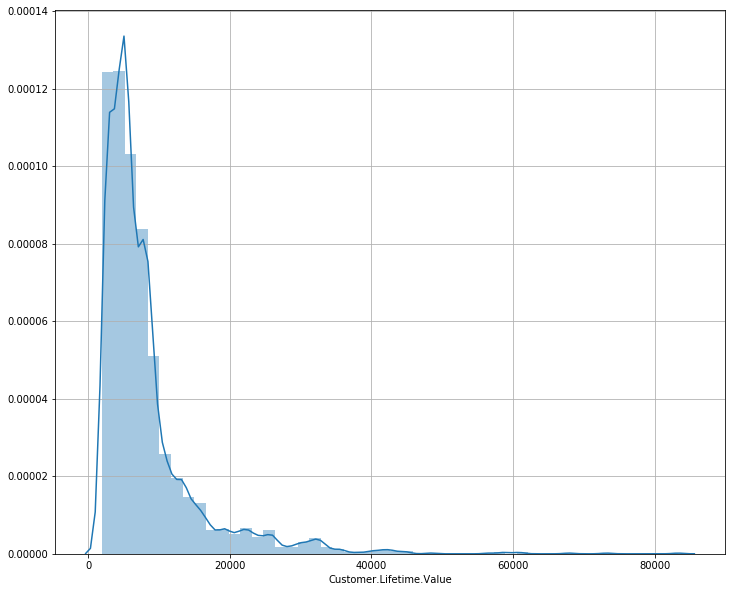

In [22]:
plt.figure(figsize = (12,10))
sns.distplot(a = score_valid['Customer.Lifetime.Value'], bins = 50)
plt.grid(True)

We can see that the target variable is right-skewed.

Intuitively, there may be few outliers. However, we shall verify this in the further plots.

## Visualization of the `categorical features`

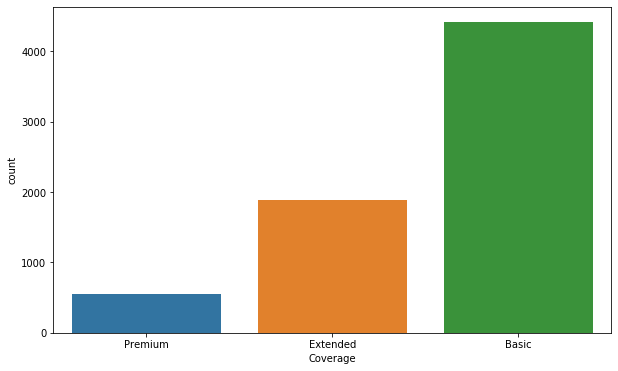

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x = score_train['Coverage'])#, x = score_train['Location.Code'])

Majority of the customers buy a *Basic* policy. Mainly, the basic auto policies consist of bodily injury liability, personal injury protection, property damage liability, collision, comprehensive and uninsured/underinsured motorist.

Ref : https://www.iii.org/article/what-covered-basic-auto-insurance-policy

Extended coverage provides vehicle owners financial protection against different kinds of issues regarding your use of your vehicle. The most popular types of extended coverage insurance are gap coverage, rental reimbursement, and towing and labor.

Ref : https://www.bestautoinsurance.com/coverage/extended-coverage.php

An insurance premium is the amount of money an individual or business must pay for an insurance policy. Insurance premiums are paid for policies that cover healthcare, auto, home, life, and others. Insurance premiums may increase after the policy.

Ref : https://www.investopedia.com/terms/i/insurance-premium.asp

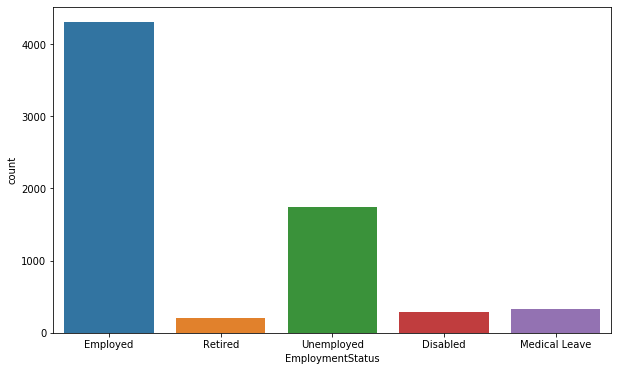

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x = score_train['EmploymentStatus'])#, x = score_train['Location.Code'])

This plot signifies that the customers who are employeed have a higher customer lifetime value, as there is guarantee that the customer will pay the premium of the policies.

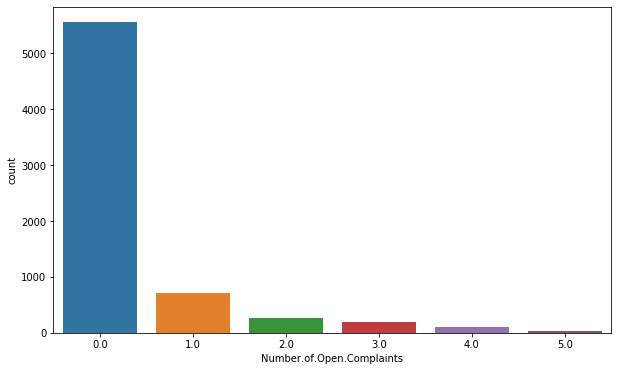

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x = score_train['Number.of.Open.Complaints'])#, x = score_train['Location.Code'])

This is a very intuituve graph that a satisfied customer does not file or report any complaint(s).

<div class="alert alert-block alert-info"><b> 

 - Note that we have performed data wrangling. This has caused some amount of munching of the data. 

</b></div>

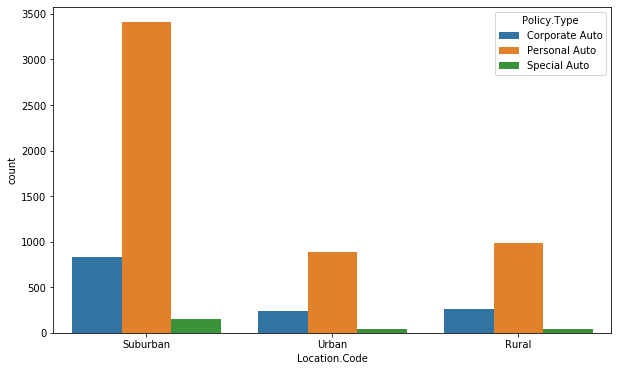

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(hue = score_train['Policy.Type'], x = score_train['Location.Code'])

The plot reveals that customers buy *personal auto policies* compared to other policy type. Also, maximum number of policies are bought by the customers living in the *suburban areas*. This does make sense as more number of people live in the suburban areas for various reasons (one of them being lower-house prices).

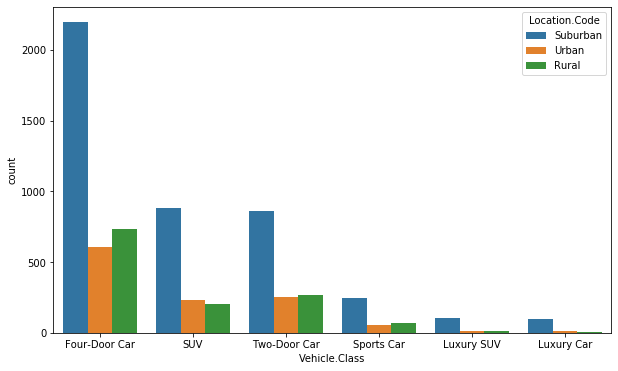

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x = score_train['Vehicle.Class'], hue = score_train['Location.Code'])

The plot above is the evidence that customers prefer to buy a *Four-Door Car* (hatchbacks, sedans or MUVs), irrespective of their location.

In [28]:
result = []
feature = []
for i in score_train[cat_cols].columns:
    count = score_train[i].value_counts()/len(score_train[i])*100
    count = count[count>=85]
    if not count.empty :
        result.append([i,count.to_string(header=None, index=None)])
        feature.append(i)

final_cat = pd.DataFrame(result, columns = ['Feature', 'Percentage of features'])
final_cat

,Feature,Percentage of features


The are no feaures either have zero variance or 1 very dominant category. So we can move forward with visualization.

<div class="alert alert-block alert-info"><b> 

 - Due to unavailibity of the data description, few features (like `Policy`, `Offer.Renew.Type` and `Vehicle.Size`) could not be explained with details.

</b></div>

## Visualization of the `numerical features`

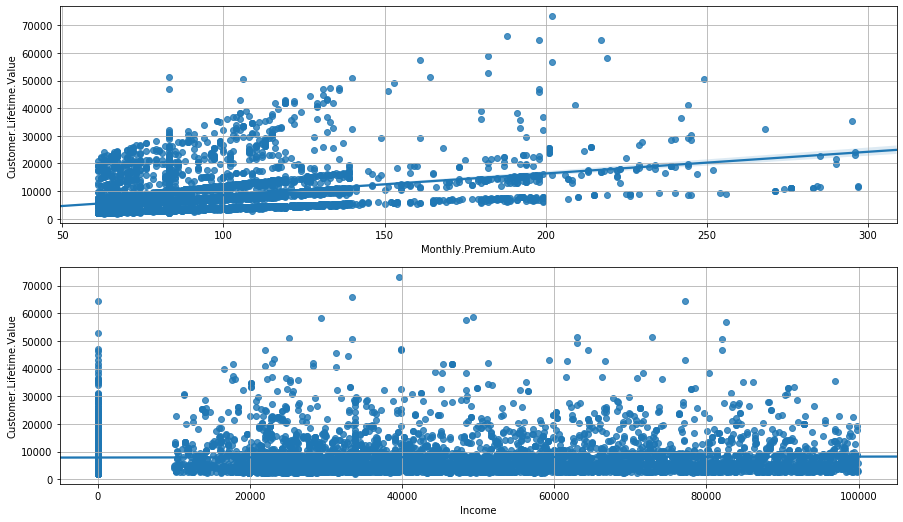

In [29]:
fig = plt.figure(figsize=(15,95))

for i in range(1,len(num_cols)):
    ax = fig.add_subplot(20, 1, i)
    g = sns.regplot(score_train[num_cols[i-1]], y = score_train['Customer.Lifetime.Value'])
    plt.grid(True)
    

Intutively, customer life time value can be expected to be dependent on the person's income. Although, the above scatter graph of `Customer.Lifetime.Value` v/s `Income` proves that this intuition is absolutely false. 

`Customer.Lifetime.Value` and `Income` are independent of each other.

In [30]:
result = []
feature = []
for i in score_train[num_cols].columns:
    count = score_train[i].value_counts()/len(score_train[i])*100
    count = count[count>=10]
    if not count.empty :
        result.append([i,count.to_string(header=None, index=None)])
        feature.append(i)

final_num = pd.DataFrame(result, columns = ['Feature', 'Percentage of features'])
final_num

,Feature,Percentage of features
0,Income,25.422494


By looking at the plots, there seem to be no major outliers. Hence, we shall move forward with the model building.

In [31]:
print(score_train.shape)
print(score_valid.shape)

(6864, 20)
(2942, 20)


### Separating the dependent and independent variables

In [9]:
X_train = score_train.drop('Customer.Lifetime.Value', axis = 1)
y_train = score_train['Customer.Lifetime.Value']

X_valid = score_valid.drop('Customer.Lifetime.Value', axis = 1)
y_valid = score_valid['Customer.Lifetime.Value']

main_test.head()

,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
CustomerID,,,,,,,,,,,,,,,,,,,
17,Basic,Bachelor,Employed,M,43836.0,Rural,Single,73.0,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
19,Extended,College,Employed,F,28812.0,Urban,Married,93.0,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize
29,Premium,Master,Employed,M,77026.0,Urban,Married,110.0,9,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.029737,Four-Door Car,Medsize
34,Basic,Bachelor,Employed,F,24599.0,Rural,Married,64.0,12,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920271,Four-Door Car,Medsize
37,Extended,Bachelor,Disabled,F,13789.0,Suburban,Divorced,79.0,8,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200000,Four-Door Car,Medsize


<div class="alert alert-block alert-info"><b> 

 - `X_train`, `y_train`, `X_valid`, `y_valid` will help us build and evaluate the models.
 - `main_test` will help us make the predictions on the original test set.

</b></div>

One last step before building the models.

Before proceeding:
 - We need to __Dummify__ the categorical features, using **OneHot Enconding**
 - **Standardize** the numerical features

In [10]:
X_train[cat_cols] = X_train[cat_cols].astype('category')
X_valid[cat_cols] = X_valid[cat_cols].astype('category')
main_test[cat_cols] = main_test[cat_cols].astype('category')

main_test[cat_cols] = main_test[cat_cols].astype('category')

### One Hot Encoding the `categorical features`

In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore')

X_train = ohe.fit_transform(X_train[cat_cols])
X_valid = ohe.transform(X_valid[cat_cols])
main_test = ohe.transform(main_test[cat_cols])

In [35]:
print(X_train.shape)
print(X_valid.shape)
print(main_test.shape)

(6864, 201)
(2942, 201)
(1767, 201)


The number of features of the `train`, `validation` and  `test` sets are equal. We have successfully encoded the categorical features and now can move forward.

### Standardization of the `numerical features`

In [12]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler(with_mean = False)

X_train_SC = SC.fit_transform(X_train)
X_valid_SC = SC.transform(X_valid)
main_test_SC = SC.transform(main_test)


We have cleaned the data. Now we can proceed to building the models.

___

# Model Building

Since our target variable has a continuous value, we will be implementing **Regression Techniques**.


#### Funtion for model buidling along with k-fold cross validation

Using `scale = True`, we will be able to build model using standardized values.

In [14]:
from sklearn.model_selection import GridSearchCV

def model_building(model, parameters = None, cv = 10, scale = False):
    if scale == False:
        if parameters == None:
            model.fit(X_train, y_train)
            return(model, model.predict(X_train), model.predict(X_valid), model.predict(main_test))
        else:
            model_cv = GridSearchCV(estimator = model, param_grid = parameters, cv = cv)
            model_cv.fit(X_train, y_train)
            model = model_cv.best_estimator_
            
            return(model_cv,model, model.predict(X_train), model.predict(X_valid), model.predict(main_test))
    else:
        if parameters == None:
            model.fit(X_train_SC, y_train)
            return(model, model.predict(X_train_SC),model.predict(X_valid_SC), model.predict(main_test_SC))
        else:
            model_cv = GridSearchCV(estimator = model, param_grid = parameters, cv = cv)
            model_cv.fit(X_train_SC, y_train)
            model = model_cv.best_estimator_
            return(model_cv,model, model.predict(X_train_SC), model.predict(X_valid_SC), model.predict(main_test_SC))

First we will build Single models that includes:
 - Linear Regression
 - Elastic Net
 - KNN Regression
 - Decision Tree Regression

In [13]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
model_report = []
mse_train = []
mae_train = []
mse_valid = []
mae_valid = []

parameters = [(LinearRegression(), {'normalize':[False, True]}),
             
              (ElasticNet(), {'alpha' : [0.1, 1],
                            'l1_ratio' : [0.5, 1]}),
              
             (DecisionTreeRegressor(), {'criterion' : ['mse','mae'],
                                       'splitter' : ['best', 'random']}),
             (KNeighborsRegressor(), {'n_neighbors' : range(1,11,2),
                                     'algorithm' : ['auto', 'brute']})]

for models, parameter in parameters :
    
    model_cv, model, pred_train, pred_valid, pred_test = model_building(models, parameters = parameter, cv = 2)
    
    print('===================================================================\n\t\t\t',
          type(models).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    mse_train.append(mean_squared_error(y_true = y_train, y_pred = pred_train))
    mae_train.append(mean_absolute_error(y_true = y_train, y_pred = pred_train))
    
    mse_valid.append(mean_squared_error(y_true = y_valid, y_pred = pred_valid))
    mae_valid.append(mean_absolute_error(y_true = y_valid, y_pred = pred_valid))


			 LinearRegression 

{'normalize': False} 


			 ElasticNet 

{'alpha': 1, 'l1_ratio': 1} 


			 DecisionTreeRegressor 

{'criterion': 'mae', 'splitter': 'random'} 


			 KNeighborsRegressor 

{'algorithm': 'auto', 'n_neighbors': 9} 




In [19]:
classifiers=['Linear Regression','Elastic Net','DT Regression','KNN Regression']

# Creating a dataframe for training results
mse_train = pd.DataFrame(mse_train,index=classifiers)  
mse_train.columns = ['MSE_train']
mae_train = pd.DataFrame(mae_train,index=classifiers)
mae_train.columns = ['MAE_train']
models_dataframe_train = pd.DataFrame.join(self = mse_train, other = mae_train, how = 'left')
models_dataframe_train.columns=['MSE_train', 'MAE_train']
models_dataframe_train['RMSE_train'] = models_dataframe_train['MSE_train'].apply(lambda x: x**(1/2))
display('-----Training Performance----',models_dataframe_train,)

print('\n')

# Creating a dataframe for validation results
mse_valid = pd.DataFrame(mse_valid,index=classifiers)  
mse_valid.columns = ['MSE_valid']
mae_valid = pd.DataFrame(mae_valid,index=classifiers)
mae_valid.columns = ['MAE_valid']
models_dataframe_valid = pd.DataFrame.join(self = mse_valid, other = mae_valid, how = 'left')
models_dataframe_valid.columns=['MSE_valid', 'MAE_valid']
models_dataframe_valid['RMSE_valid'] = models_dataframe_valid['MSE_valid'].apply(lambda x: x**(1/2))
display('-----Validation Performance----',models_dataframe_valid)

'-----Training Performance----'

,MSE_train,MAE_train,RMSE_train
Linear Regression,1.657519e+07,2247.918771,4071.264371
Elastic Net,1.659152e+07,2225.100201,4073.269012
DT Regression,2.828575e-02,0.002871,0.168184
KNN Regression,2.007774e+07,2388.555704,4480.818839


'-----Validation Performance----'

,MSE_valid,MAE_valid,RMSE_valid
Linear Regression,2.115167e+07,2398.329847,4599.094792
Elastic Net,2.110261e+07,2368.525291,4593.757421
DT Regression,3.094810e+07,2083.013024,5563.101515
KNN Regression,2.902722e+07,2759.202344,5387.691912


Observations from the above table:
 - `Linear Regression` and `Elastic Net` have similar behavior.
 - In `Decision Tree Regression`, the validation **RMSE** is high; although **MAE** value is the lowest.
 - For `KNN Regression`, the training error is low. However the validation metrics are higher than the other models.

<div class="alert alert-block alert-info"><b> 
    
   - There are possibilities that using **Standardized dataset**, the performance metrics may increase.
   - For this, we only have to change the attribute `scale = True` in `model_buildling`.

</b></div>

In [20]:

mse_train_SC = []
mae_train_SC = []
mse_valid_SC = []
mae_valid_SC = []
parameters = [(LinearRegression(), {'normalize':[False, True]}),
             
              (ElasticNet(), {'alpha' : [0.1, 0.5, 1],
                            'l1_ratio' : [0, 0.5, 1]}),
              
             (DecisionTreeRegressor(), {'criterion' : ['mse','mae'],
                                       'splitter' : ['best', 'random']}),
             (KNeighborsRegressor(), {'n_neighbors' : range(1,11,2),
                                     'algorithm' : ['auto', 'brute']})]

for models, parameter in parameters :
    
    model_cv, model, pred_train_SC, pred_valid_SC, pred_test_SC = model_building(models, parameters = parameter, cv = 5, scale = True)
    
    print('===================================================================\n\t\t\t',
          type(models).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    mse_train_SC.append(mean_squared_error(y_true = y_train, y_pred = pred_train_SC))
    mae_train_SC.append(mean_absolute_error(y_true = y_train, y_pred = pred_train_SC))
    
    mse_valid_SC.append(mean_squared_error(y_true = y_valid, y_pred = pred_valid_SC))
    mae_valid_SC.append(mean_absolute_error(y_true = y_valid, y_pred = pred_valid_SC))


			 LinearRegression 

{'normalize': False} 


			 ElasticNet 

{'alpha': 0.1, 'l1_ratio': 0.5} 


			 DecisionTreeRegressor 

{'criterion': 'mse', 'splitter': 'random'} 


			 KNeighborsRegressor 

{'algorithm': 'auto', 'n_neighbors': 9} 




In [31]:
classifiers=['Linear Regression','Elastic Net','DT Regression','KNN Regression']
# models = [LinearRegression(), ElasticNet(),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=3)]


# Creating a dataframe for training results
mse_train_SC = pd.DataFrame(mse_train_SC,index=classifiers)  
mse_train_SC.columns = ['MSE_train_SC']
mae_train_SC = pd.DataFrame(mae_train_SC,index=classifiers)
mae_train.columns = ['MAE_train_SC']
models_dataframe_train_SC = pd.DataFrame.join(self = mse_train_SC, other = mae_train_SC, how = 'left')
models_dataframe_train_SC.columns=['MSE_train_SC', 'MAE_train_SC']
models_dataframe_train_SC['RMSE_train_SC'] = models_dataframe_train_SC['MSE_train_SC'].apply(lambda x: x**(1/2))
display('-----Training Performance---',models_dataframe_train_SC)

print('\n')

# Creating a dataframe for validation results
mse_valid_SC = pd.DataFrame(mse_valid_SC,index=classifiers)  
mse_valid_SC.columns = ['MSE_valid_SC']
mae_valid_SC = pd.DataFrame(mae_valid_SC,index=classifiers)
mae_valid_SC.columns = ['MAE_valid_SC']
models_dataframe_valid_SC = pd.DataFrame.join(self = mse_valid_SC, other = mae_valid_SC, how = 'left')
models_dataframe_valid_SC.columns=['MSE_valid_SC', 'MAE_valid_SC']
models_dataframe_valid_SC['RMSE_valid'] = models_dataframe_valid_SC['MSE_valid_SC'].apply(lambda x: x**(1/2))
display('-----Validation Performance----',models_dataframe_valid_SC)

'-----Training Performance---'

,MSE_train_SC,MAE_train_SC,RMSE_train_SC
Linear Regression,1.657519e+07,2247.918741,4071.264371
Elastic Net,1.661538e+07,2195.000961,4076.196740
DT Regression,2.828575e-02,0.002871,0.168184
KNN Regression,3.080705e+07,3390.267084,5550.409674


'-----Validation Performance----'

,MSE_valid_SC,MAE_valid_SC,RMSE_valid
Linear Regression,2.115167e+07,2398.329827,4599.094807
Elastic Net,2.127874e+07,2351.695308,4612.888657
DT Regression,3.131867e+07,2111.492728,5596.308891
KNN Regression,4.494889e+07,3900.545439,6704.393115


Comparing the `Standardized Performance Metrics` with `Non-Standardized Performance Metrics`, the following are the observations:
 - `Linear Regression` adnd `Elastic Net` performance has not changed significantly.
 - `Decision Tree Regression` metric changes are also not too significant.
 - `KNN Regression` has increased errors, both in training and validation set.

### Hence, `Standardizing` the data does not guarantee better performance.

# Ensemble Models

An ensemble is a composite model, combines a series of low performing classifiers with the aim of creating an improved classifier. Ensembles offer more accuracy than individual or base classifier. Ensemble methods can parallelize by allocating each base learner to different-different machines.

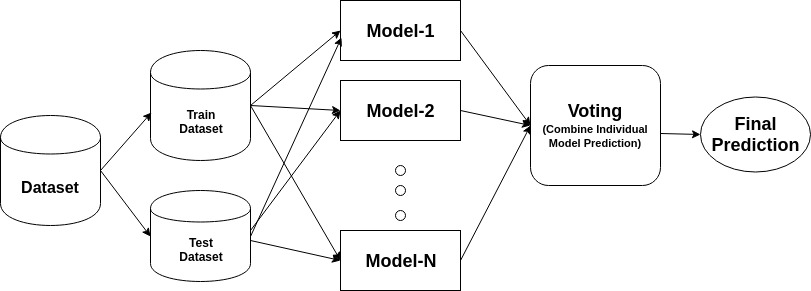

Ensemble methods can decrease variance using bagging approach, bias using a boosting approach, or improve predictions using stacking approach:
 - Bagging stands for bootstrap aggregation. It combines multiple learners in a way to reduce the variance of estimates.
 - Boosting algorithms are a set of the low accurate classifier to create a highly accurate classifier.
 - Stacking is an ensemble learning technique that combines multiple base classification models predictions into a new data set.
 
Ref : https://www.datacamp.com/community/tutorials/adaboost-classifier-python

## AdaBoost Regressor

It can be used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. 

Pros:
 - AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. 

Cons: 
- AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly.

Ref : https://www.datacamp.com/community/tutorials/adaboost-classifier-python

In [22]:
from sklearn.ensemble import AdaBoostRegressor

adr = AdaBoostRegressor()

parameters = {'n_estimators' : [7 ,15, 20, 25], 
              'learning_rate' : [0.1,0.2, 0.3],
              'loss': ['linear', 'square', 'exponential']}
adr = AdaBoostRegressor()

model_cv, model_adr, pred_train_adr, pred_valid_adr, pred_test_adr = model_building(adr, parameters = parameters, cv = 5, scale = False)#, scale=True)

In [ ]:
print('Train MSE:',mean_squared_error(y_true = y_train, y_pred = pred_train_adr))
print('Train MAE:',mean_absolute_error(y_true = y_train, y_pred = pred_train_adr))
print('Train RMSE:',mean_squared_error(y_true = y_train, y_pred = pred_train_adr)**0.5)
print('\n')
print('Validation MSE: ',mean_squared_error(y_true = y_valid, y_pred = pred_valid_adr))
print('Validation MAE: ',mean_absolute_error(y_true = y_valid, y_pred = pred_valid_adr))
print('Validation RMSE:',mean_squared_error(y_true = y_valid, y_pred = pred_valid_adr)**0.5)

In [ ]:
print(model_cv.best_estimator_)

Compared to all the other ensemble models made above, AdaBoost Regressor has relative train-validation errors. The combination of weak learners helped to improve the performance metrics.

Hence, this is the reason why we selected AdaBoost for oour regression problem.

___

In [25]:
ADRMSE_train = mean_squared_error(y_true = y_train, y_pred = pred_train_adr)
ADRRMSE_train = np.sqrt(mean_squared_error(y_true = y_train, y_pred = pred_train_adr))
ADRMAE_train = mean_absolute_error(y_true = y_train, y_pred = pred_train_adr)

ADRMSE_valid = mean_squared_error(y_true = y_valid, y_pred = pred_valid_adr)
ADRRMSE_valid = np.sqrt(mean_squared_error(y_true = y_valid, y_pred = pred_valid_adr))
ADRMAE_valid = mean_absolute_error(y_true = y_valid, y_pred = pred_valid_adr)
ADRRScores = [ADRMSE_train, ADRRMSE_train, ADRMAE_train,
              ADRMSE_valid, ADRRMSE_valid, ADRMAE_valid]

ADR = pd.DataFrame(ADRRScores, index=['Train MSE', 'Train RMSE', 'Train MAE',
                                      'Validation MSE','Validation RMSE','Validation MAE'],
                  columns = ['AdaBoost Regression'])

AD = ADR.T

In [26]:
AD

,Train MSE,Train RMSE,Train MAE,Validation MSE,Validation RMSE,Validation MAE
AdaBoost Regression,1.882349e+07,4338.605055,2672.447143,2.372999e+07,4871.343486,2818.257534


## Exporting the predicted values

In [27]:
pred = pd.DataFrame([pred_test_adr], index = ['Customer.Lifetime.Value'])
pred = pred.transpose()
pred

,Customer.Lifetime.Value
0,6920.572973
1,6920.572973
2,6920.572973
3,6920.572973
4,6920.572973
...,...
1762,6950.029596
1763,6920.572973
1764,6986.183967
1765,6950.029596


In [28]:
final_test = pd.read_csv('C:\\Neeraj\\acads\\INSOFE\\STUDY MATERIAL\\MiTH\\sample_submission-1574429481138.csv')
final_test = final_test['CustomerID']
final_test = pd.DataFrame(final_test)

In [29]:
# final_result = pd.concat([final_test, pred], axis = 0, )
final_result = pd.DataFrame.join(self = final_test, other = pred, how = 'left')
final_result

,CustomerID,Customer.Lifetime.Value
0,14,6920.572973
1,20,6920.572973
2,21,6920.572973
3,23,6920.572973
4,24,6920.572973
...,...,...
1762,8760,6950.029596
1763,8768,6920.572973
1764,8773,6986.183967
1765,8775,6950.029596


In [30]:
predicted_values_adr = final_result.to_csv('C:\\Neeraj\\acads\\INSOFE\\STUDY MATERIAL\\MiTH\\submission(mith,adr).csv', index=None, header = True)

___